**Mateusz Podporski, nr. alb. 152774**

## Problem decyzyjny – wybór telefonu

### Kryteria oceny i wagi

- **Cena** – 4/21 *(kosztowe)*  
- **Wydajność procesora (Antutu benchmark)** – 3/21 *(zyskowe)*  
- **Bateria** – 5/21 *(zyskowe)*  
- **Jakość zdjęć i filmów (DXOMARK)** – 5/21 *(zyskowe)*  
- **RAM** – 2/21 *(zyskowe)*  
- **Design** – 2/21 *(zyskowe)*  

---

### Telefony brane pod uwagę

- Samsung S25 Ultra  
- Vivo X200 Pro  
- Honor Magic7 Pro
- iPhone 17 Pro Max  
- Pixel 10 Pro


Miejsce 1: Honor Magic7 Pro | Performance score: 0.66
Miejsce 2: Vivo X200 Pro | Performance score: 0.61
Miejsce 3: Samsung S25 Ultra | Performance score: 0.58
Miejsce 4: Pixel 10 Pro | Performance score: 0.40
Miejsce 5: Iphone 17 Pro Max | Performance score: 0.32


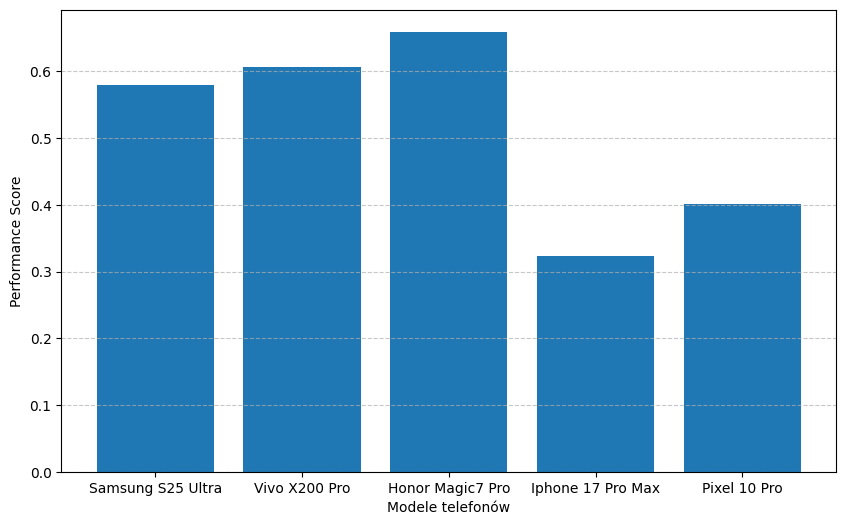

In [3]:
import numpy as np
import matplotlib.pyplot as plt

alternatives = ["Samsung S25 Ultra", "Vivo X200 Pro", "Honor Magic7 Pro", "Iphone 17 Pro Max", "Pixel 10 Pro"]
criteria = ["Cena", "Wydajność procesora", "Bateria", "Jakość zdjęć/filmów", "RAM", "Design"]
weights = np.array([4/21, 3/21, 5/21, 5/21, 2/21, 2/21])

decision_matrix = np.array([
    [5699,2_873_231,5000,151,12,9],
    [5300,2_056_873,6000,167,16,8],
    [4000,2_524_448,5270,148,12,6],
    [7300,2_374_676,5088,161,12,6],
    [5300,1_415_000,4870,163,16,7]
])

denominators = np.sqrt(np.sum(decision_matrix**2,axis=0))
normalized_matrix = decision_matrix / denominators
weighted_matrix = normalized_matrix * weights

# print(np.round(weighted_matrix,4))

criteria = np.array([-1,1,1,1,1,1])

ideal = np.max(weighted_matrix * criteria, axis=0) * criteria
anti_ideal = np.min(weighted_matrix * criteria, axis=0) * criteria

# print(ideal)
# print(anti_ideal)

dist_to_ideal = np.sqrt(np.sum((weighted_matrix - ideal)**2, axis=1))
dist_to_anti_ideal = np.sqrt(np.sum((weighted_matrix - anti_ideal)**2,axis=1))
# print(dist_to_ideal)
# print(dist_to_anti_ideal)

performance_score = dist_to_anti_ideal / (dist_to_ideal + dist_to_anti_ideal) 
# print(performance_score)

ranking_indicies = np.argsort(performance_score)[::-1]
# print(ranking_indicies)

for i,j in enumerate(ranking_indicies):
    print(f"Miejsce {i+1}: {alternatives[j]} | Performance score: {performance_score[j]:.2f}")


plt.figure(figsize=(10,6))
plt.bar(alternatives,performance_score)
plt.xlabel("Modele telefonów")
plt.ylabel("Performance Score")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Podsumowanie i wnioski

### Wyniki zgodne z oczekiwaniami?
**Tak**, metoda TOPSIS wybrała **Honor Magic7 Pro** jako najlepszy telefon, co jest logiczne:
- Najniższa cena (4000 PLN) przy dobrych parametrach
- Wysoka bateria (5270 mAh) i wydajność (2.5M Antutu)
- iPhone 17 Pro Max na ostatnim miejscu ze względu na wysoką cenę (7300 PLN)

### Mocne strony metody TOPSIS
- Obiektywna ocena oparta na odległościach od rozwiązania idealnego i anty-idealnego  
- Elastyczne wagi kryteriów (bateria i jakość zdjęć miały największą wagę 5/21)  
- Obsługa kryteriów kosztowych (cena) i zyskowych (wydajność, RAM, etc.)  
- Wyniki znormalizowane i porównywalne (skala 0-1)

